In [1]:
#importing of necessary libraries

import pandas as pd  
import numpy as np  
import seaborn as sns 
import pyreadstat 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [6]:
df1 = pd.read_csv("../data/PPH data.csv", )

In [3]:
df2 = pd.read_csv("../data/Identification data.csv")

In [8]:
# Concatenating the DataFrames while preserving the number of rows
df = pd.concat([df1, df2], axis=1)


# Drop the 'Unnamed: 0' column from the DataFrame
df = df.drop(columns=["Unnamed: 0"])

df

,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Compile any report containing MNH services?,Frequency these reports compiled?,Other specify.1,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,25.0,1.0,88.0,0.0,75.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7604,24.0,1.0,0.0,0.0,999.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7605,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7606,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Columns: 216 entries, Age to Does the facility have internet access ?
dtypes: float64(203), object(13)
memory usage: 12.5+ MB


In [10]:
df.isnull().sum()

Age                                                                                 2
Parity of index pregnanacy                                                       6111
Complications in previous pregnancy                                              6111
Refered                                                                          6111
Pretreatment pulse                                                               6111
                                                                                 ... 
Calculate institutional stillbirth rate ?                                         260
calculate institutional low birth weight rate ?                                   260
have a designated data manager  responsible for  service data including MNCH?     260
Does this facility have a computer?                                                 2
Does the facility have internet access ?                                            2
Length: 216, dtype: int64

In [15]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Age                                                                              0.0
Parity of index pregnanacy                                                       0.0
Complications in previous pregnancy                                              0.0
Refered                                                                          0.0
Pretreatment pulse                                                               0.0
                                                                                ... 
Calculate institutional stillbirth rate ?                                        0.0
calculate institutional low birth weight rate ?                                  0.0
have a designated data manager  responsible for  service data including MNCH?    0.0
Does this facility have a computer?                                              0.0
Does the facility have internet access ?                                         0.0
Length: 192, dtype: float64

In [11]:
# Define the threshold for null values (90%)
threshold = 0.9

# Drop columns where the proportion of NaN values is >= 90%
df = df.loc[:, df.isnull().mean() < threshold]

In [12]:
df

,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Is a system in place regularly to collects MNH service data ?,Compile any report containing MNH services?,Frequency these reports compiled?,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,25.0,1.0,88.0,0.0,75.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7604,24.0,1.0,0.0,0.0,999.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7605,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7606,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [13]:

# Set a random seed for reproducibility
np.random.seed(5954)

# Function to impute missing values based on the probability distribution of existing values for all columns
def impute_with_probability_all_columns(df):
    for column in df.columns:
        # Get the values excluding NaN for the current column
        non_na_values = df[column].dropna()
        
        # Only impute if there are missing values and at least one non-missing value
        if df[column].isna().sum() > 0 and len(non_na_values) > 0:
            # Sample from the non-NaN values with replacement
            random_sample = np.random.choice(non_na_values, size=df[column].isna().sum(), replace=True)
            
            # Fill NaN values with the sampled values
            df.loc[df[column].isna(), column] = random_sample

# Apply the function to the entire DataFrame
impute_with_probability_all_columns(df)

print("\nDataFrame after imputing missing values in all columns:")
df


DataFrame after imputing missing values in all columns:


,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Is a system in place regularly to collects MNH service data ?,Compile any report containing MNH services?,Frequency these reports compiled?,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
0,77.0,3.0,0.0,0.0,999.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,77.0,9.0,0.0,0.0,100.0,1.0,9999.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,25.0,1.0,88.0,0.0,75.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,77.0,4.0,88.0,0.0,90.0,1.0,9999.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,77.0,9.0,88.0,0.0,999.0,1.0,9999.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,77.0,1.0,0.0,0.0,80.0,1.0,9999.0,9.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7604,24.0,1.0,0.0,0.0,999.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7605,77.0,9.0,0.0,1.0,85.0,1.0,9999.0,3.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7606,77.0,2.0,0.0,1.0,999.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [16]:
df.describe()

,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Is a system in place regularly to collects MNH service data ?,Compile any report containing MNH services?,Frequency these reports compiled?,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
count,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,...,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,67.556651,3.917192,13.059674,0.116193,541.927182,0.885384,8795.415089,6.830310,0.079522,1.478970,...,0.966088,0.997766,1.473975,0.875789,0.076893,0.521819,0.580310,0.697687,0.696241,0.067560
std,20.022800,2.953294,31.245721,0.320478,455.881081,0.318579,3089.397947,7.380884,0.295198,10.624936,...,0.181014,0.047221,5.764618,0.329844,0.266439,0.499557,0.493541,0.459290,0.459910,0.251007
min,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,2.000000,0.000000,0.000000,85.000000,1.000000,9999.000000,3.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.000000,3.000000,0.000000,0.000000,160.000000,1.000000,9999.000000,9.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,77.000000,4.000000,0.000000,0.000000,999.000000,1.000000,9999.000000,9.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,99.000000,9.000000,96.000000,1.000000,999.000000,1.000000,9999.000000,96.000000,2.000000,96.000000,...,1.000000,1.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


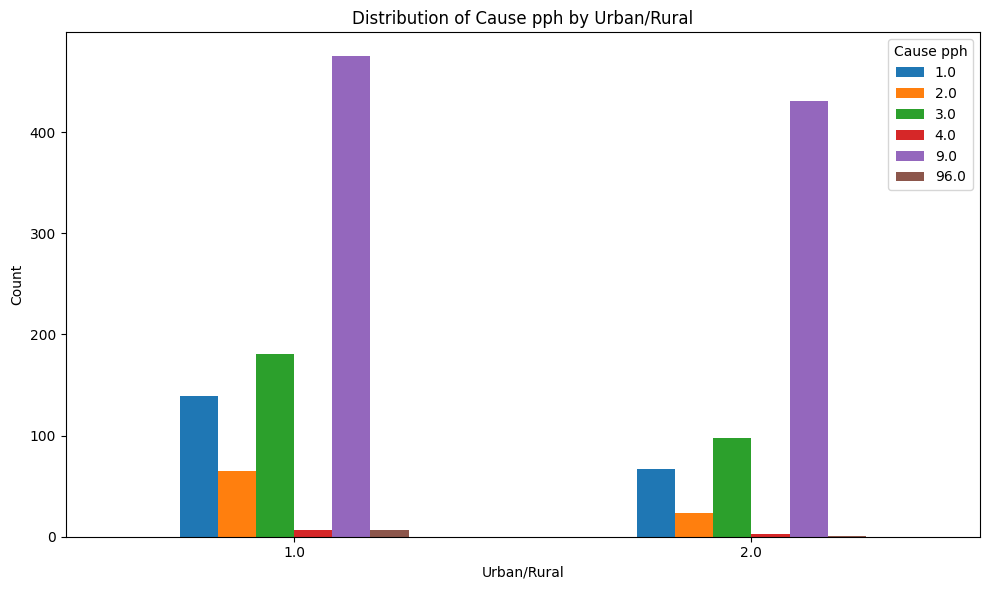

In [5]:
# Group by 'Urban/rural' and 'Cause pph' and count occurrences
urban_rural_cause = df.groupby(['Urban/rural', 'Cause pph']).size().unstack().fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
urban_rural_cause.plot(kind='bar', ax=ax)

# Customize the plot
ax.set_title('Distribution of Cause pph by Urban/Rural')
ax.set_xlabel('Urban/Rural')
ax.set_ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Cause pph')
plt.tight_layout()
plt.show()

